Alumno: Milton Aldair Martínez Acosta  

Matrícula: 1870354

Estadística Aplicada

Grupo: 051

## Estrategia propuesta

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 16.8 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd 
import yfinance as yf
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pep = yf.download('PEP', 
                       start='2014-01-01', 
                       end='2017-12-31',
                       progress=False)

In [ ]:
##renombar columna
pep.rename(columns = {'Adj Close':'adj_close'}, inplace=True)

In [ ]:
## calcular los retornos
pep['retorno_simple'] = pep.adj_close.pct_change()

In [ ]:
print('Rango de fechas:', min(pep.index.date), '-', max(pep.index.date))
print('Numero de observaciones:', pep.shape[0])
print(f'Media: {pep.retorno_simple.mean():.4f}')
print(f'Mediana: {pep.retorno_simple.median():.4f}')
print(f'Mínimo: {pep.retorno_simple.min():.4f}')
print(f'Máximo: {pep.retorno_simple.max():.4f}')
print(f'Desviación Estándar: {pep.retorno_simple.std():.4f}')
print(f'Skewness (símetría): {pep.retorno_simple.skew():.4f}') ## que tan centrada esta la dist
print(f'Kurtosis: {pep.retorno_simple.kurtosis():.4f}')     ## que tan alta esta la dist


Rango de fechas: 2014-01-02 - 2017-12-29
Numero de observaciones: 1007
Media: 0.0005
Mediana: 0.0004
Mínimo: -0.0459
Máximo: 0.0318
Desviación Estándar: 0.0082
Skewness (símetría): -0.2356
Kurtosis: 1.9467


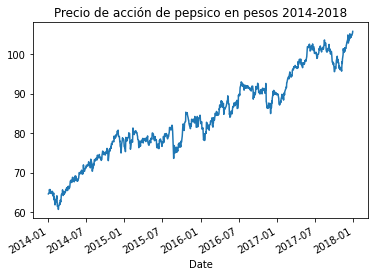

In [ ]:
#graficamos la evolución de la accion
pep['adj_close'].plot()
plt.title('Precio de acción de pepsico en pesos 2014-2018')
plt.show()

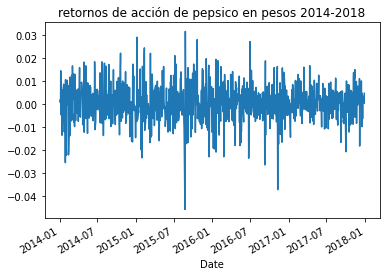

In [ ]:
#graficamos los retornos
pep['retorno_simple'].plot()
plt.title('retornos de acción de pepsico en pesos 2014-2018')
plt.show()

In [ ]:
#vamos a calcular el promedio movil de la acción a 10 días y a 50 días

pep['MA10'] = pep['adj_close'].rolling(10).mean()
pep['MA50'] = pep['adj_close'].rolling(50).mean()
pep = pep.dropna()
pep.head()

,Open,High,Low,Close,adj_close,Volume,retorno_simple,MA10,MA50
Date,,,,,,,,,
2014-03-14,81.730003,82.190002,80.860001,81.000000,64.202507,7763000,-0.009780,64.419159,63.774819
2014-03-17,81.470001,82.139999,81.290001,82.050003,65.034760,7762000,0.012963,64.663973,63.783170
2014-03-18,82.019997,82.220001,81.589996,81.949997,64.955490,3488300,-0.001219,64.796181,63.787731
2014-03-19,81.980003,81.989998,81.190002,81.370003,64.495766,5106000,-0.007078,64.816787,63.782468
2014-03-20,81.360001,81.910004,81.250000,81.860001,64.884171,3241100,0.006022,64.858798,63.766085


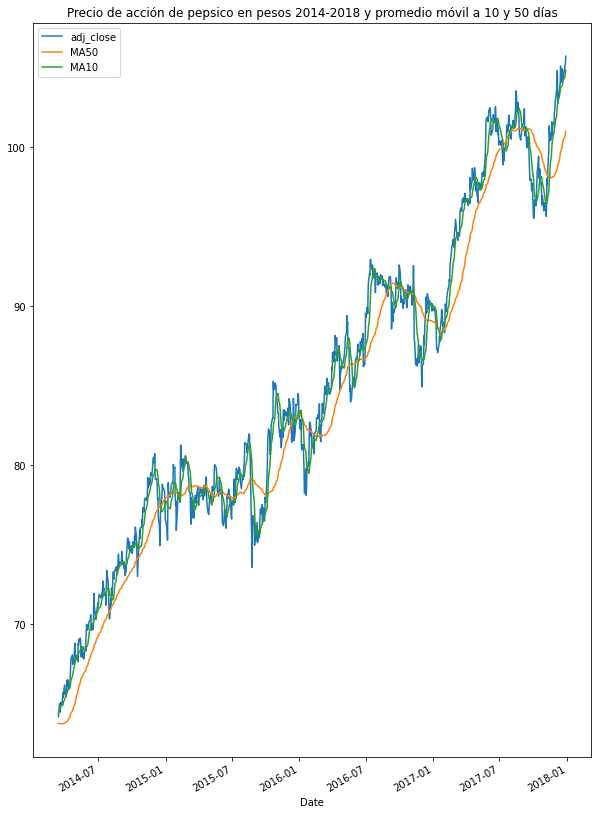

In [ ]:
#vamos a graficar
pep[['adj_close', 'MA50', 'MA10']].plot(figsize=(10,15))
plt.title('Precio de acción de pepsico en pesos 2014-2018 y promedio móvil a 10 y 50 días')
plt.show()

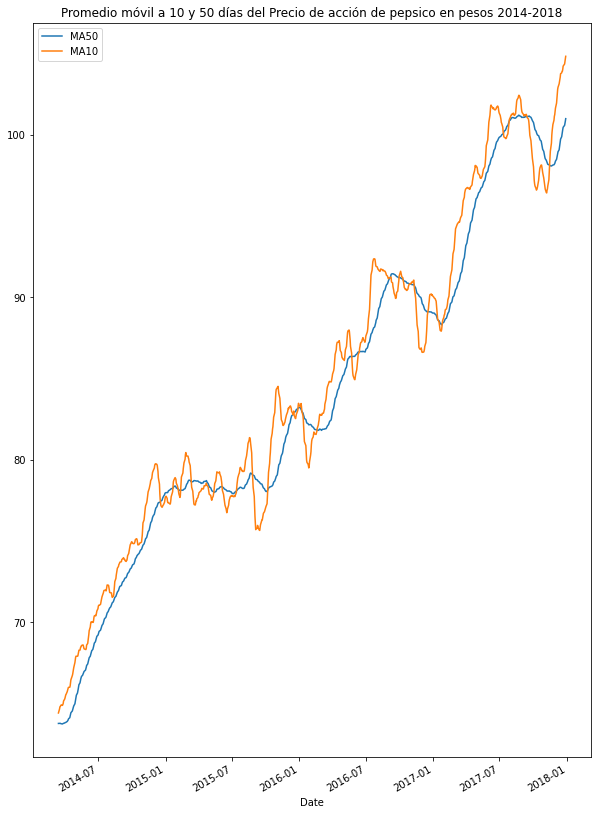

In [ ]:
#vamos a graficar
pep[[ 'MA50', 'MA10']].plot(figsize=(10,15))
plt.title('Promedio móvil a 10 y 50 días del Precio de acción de pepsico en pesos 2014-2018')
plt.show()

In [ ]:
#Añadimos una nueva columna llamada "Shares", si MA10>MA50, asignamos un 1, sino, colocamos un 0 

pep['Shares'] = [1 if pep.loc[ei, 'MA10']>pep.loc[ei, 'MA50'] else 0 for ei in pep.index]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


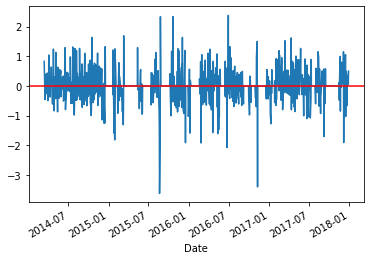

In [58]:
#Añadimos una nueva columna llamada "Profit" usando 1 y 0 creados con anterioridad
#Shares=1, significa que mantenemos o compramos la acciónpor lo que la genancia 
#es el precio de hoy menos el precio de ayer.
# Si share=0, las ganacias son cero porque no tenemos la acción en el portafolio 0.

#graficamos las pérdidas y ganacias de esta estrategia

pep['close_ayer'] = pep['adj_close'].shift(-1)
pep['Profit'] = [pep.loc[ei, 'close_ayer'] - pep.loc[ei, 'adj_close'] if pep.loc[ei, 'Shares']==1 else 0 for ei in pep.index]
pep['Profit'].plot()
plt.axhline(y=0, color='red')
plt.show()

In [59]:
#Usamos .cumsum() para calcular las ganacias del periodo

pep['ganancia_acumulada'] = pep['Profit'].cumsum()
pep.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Close,adj_close,Volume,retorno_simple,MA10,MA50,Shares,close_ayer,Profit,ganancia_acumulada,Shares2,Profit2,ganancia_acumulada2
Date,,,,,,,,,,,,,,,,
2017-12-22,118.599998,118.750000,118.169998,118.599998,104.561447,2045600,0.002875,104.241416,100.473926,1,104.817131,0.255684,10.687187,1,-0.299759,-63.030800
2017-12-26,118.410004,119.239998,118.410004,118.889999,104.817131,2156300,0.002445,104.373661,100.598164,1,105.178589,0.361458,11.048645,1,-0.255684,-63.286484
2017-12-27,118.870003,119.400002,118.800003,119.300003,105.178589,2465100,0.003448,104.541172,100.712996,1,105.222679,0.044090,11.092735,1,-0.361458,-63.647942
2017-12-28,119.330002,119.529999,119.050003,119.349998,105.222679,1999300,0.000419,104.677825,100.852875,1,105.725212,0.502533,11.595268,1,-0.044090,-63.692032
2017-12-29,119.459999,120.570000,119.419998,119.919998,105.725212,3116400,0.004776,104.845336,101.007007,1,NaN,NaN,NaN,1,-0.502533,-64.194565


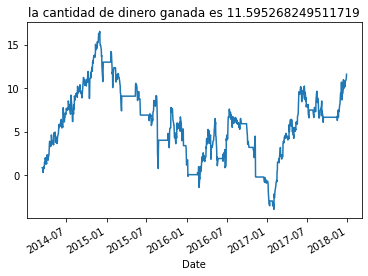

In [60]:
#graficamos la ganacia acumulada del periodo

pep['ganancia_acumulada'].plot()
plt.title('la cantidad de dinero ganada es {}'.format(pep.loc[pep.index[-2], 'ganancia_acumulada']))
plt.show()

## Estrategia de inversión propia

In [61]:
#Añadimos una nueva columna llamada "Shares2", si el precio no ha bajado más del 2%, asignamos un 1, sino, colocamos un 0 

pep['Shares2'] = [1 if pep.loc[ei, 'adj_close'] > 0.98*pep.loc[ei, 'close_ayer'] else 0 for ei in pep.index]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


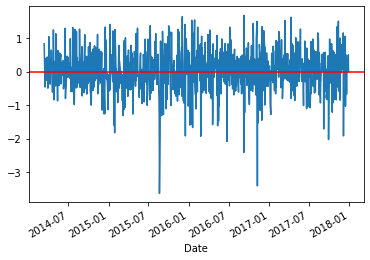

In [62]:
#Añadimos una nueva columna llamada "Profit2" usando 1 y 0 creados con anterioridad
#Shares2=1, significa que mantenemos o compramos la acciónpor lo que la genancia 
#es el precio de hoy menos el precio de ayer.
# Si shares2=0, las ganacias son cero porque no tenemos la acción en el portafolio 0.

#graficamos las pérdidas y ganacias de esta estrategia

pep['Profit2'] = [pep.loc[ei, 'close_ayer'] - pep.loc[ei, 'adj_close'] if pep.loc[ei, 'Shares2']==1 else 0 for ei in pep.index]
pep['Profit2'].plot()
plt.axhline(y=0, color='red')
plt.show()

In [63]:
#Usamos .cumsum() para calcular las ganacias del periodo

pep['ganancia_acumulada2'] = pep['Profit2'].cumsum()
pep.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Close,adj_close,Volume,retorno_simple,MA10,MA50,Shares,close_ayer,Profit,ganancia_acumulada,Shares2,Profit2,ganancia_acumulada2
Date,,,,,,,,,,,,,,,,
2017-12-22,118.599998,118.750000,118.169998,118.599998,104.561447,2045600,0.002875,104.241416,100.473926,1,104.817131,0.255684,10.687187,1,0.255684,22.783745
2017-12-26,118.410004,119.239998,118.410004,118.889999,104.817131,2156300,0.002445,104.373661,100.598164,1,105.178589,0.361458,11.048645,1,0.361458,23.145203
2017-12-27,118.870003,119.400002,118.800003,119.300003,105.178589,2465100,0.003448,104.541172,100.712996,1,105.222679,0.044090,11.092735,1,0.044090,23.189293
2017-12-28,119.330002,119.529999,119.050003,119.349998,105.222679,1999300,0.000419,104.677825,100.852875,1,105.725212,0.502533,11.595268,1,0.502533,23.691826
2017-12-29,119.459999,120.570000,119.419998,119.919998,105.725212,3116400,0.004776,104.845336,101.007007,1,NaN,NaN,NaN,0,0.000000,23.691826


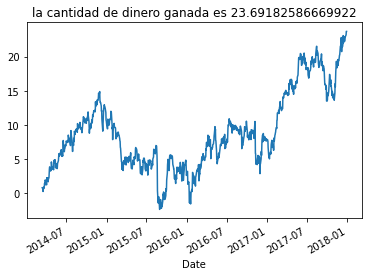

In [64]:
#graficamos la ganacia acumulada del periodo

pep['ganancia_acumulada2'].plot()
plt.title('la cantidad de dinero ganada es {}'.format(pep.loc[pep.index[-2], 'ganancia_acumulada2']))
plt.show()

## Reflexión final

Entre la estrategia planteada de vender si el MA10>MA50 y la estrategia propia de vender si el precio cae más del 2% observamos que la segunda nos genera más ganancias.


La estrategia planteada se puede considerar más segura ya que al hablar de promedios moviles los picos y valles afectan menos, sin embargo, como vimos la desventaja es que al ser menos arriesgada tiene menos ganancias.

Por otro lado la estrategia propia es menos segura, ya que al considerar por días, un día te puede caer la acción un 10% y pierdes mucho pero otro te puede subir el mismo 10% y ganas mucho. Tiene más riesgo y como vimos más recompensa.